# LAB: SVM: Continuamos con las predicciones sobre datos de cáncer de mama

## 1. Introducción

Continuamos con la tarea encarada en otros labs de clasificación de predecir el diagnóstico de cáncer de mama a partir de las características de las células.


* class_t es la variable target

* el resto son variables con valores normalizados de 1 a 10


[Aquí](https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.names) pueden encontrar más información sobre el dataset.

**Nota:** se eliminaron del dataset original 16 casos con valores perdidos en algunos campos.

In [1]:
# Importamos las librerías a utilizar
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
### Importamos los datos

df = pd.read_csv('../Data/breast-cancer.csv', header = None)
df.columns = ['ID', 'clump_Thickness', 'unif_cell_size', 'unif_cell_shape', 'adhesion', 'epith_cell_Size', 'bare_nuclei',
              'bland_chromatin ','norm_nucleoli', 'mitoses', 'class_t']
df.sample(3)

,ID,clump_Thickness,unif_cell_size,unif_cell_shape,adhesion,epith_cell_Size,bare_nuclei,bland_chromatin,norm_nucleoli,mitoses,class_t
424,566509,5,1,1,1,2,1,1,1,1,2
140,1184184,1,1,1,1,2,5,1,1,1,2
442,1259008,8,8,9,6,6,3,10,10,1,4


## 2. Workflow de clasificación

La idea es implementar el modelo sobre el dataset utilizando cross validation para hacer una búsqueda sobre los hiperparámetros. 
Para tener tanto una estimación de los hiperparámetros óptimos como una idea de la performance sobre el modelo sobre datos nuevos vamos a completar el siguiente workflow:

<img src='worflowtt.png'></img>

Realicen el workflow teniendo en cuenta las siguientes condiciones:

1) Hacer un split train/test incial dejando 75% y 25% de los datos respectivamente

2) A la hora de explorar los hiperparámetros probar los valores de C = [1, 10, 100, 1000] 

3) Utilizar 5 folds para el calcular el score de cross validation



In [3]:
X = df[['clump_Thickness', 'unif_cell_size', 'unif_cell_shape', 'adhesion', 'epith_cell_Size', 'bare_nuclei',
              'bland_chromatin ','norm_nucleoli', 'mitoses']] # 'ID' excluded
y = df['class_t']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y) # default values split 75% train, 25% test

In [17]:
svc_C = np.linspace(0.01, 0.03, 5)
svc_gamma = ['auto', 0.0001, 0.0005, 0.001, 0.005]
kernels = ['linear', 'rbf']
scores = []
for c in svc_C:
    for g in svc_gamma:
        for k in kernels:
            model_svc = SVC(kernel=k, class_weight='balanced', C=c, gamma = g)
            score = np.mean(cross_val_score(model_svc, X_train, y_train,cv=5))
            scores.append({
                'kernel': k,
                'gamma': g,
                'C': c,
                'score': score
            })

scores_df = pd.DataFrame(scores)

In [18]:
scores_df.sort_values('score', ascending=False)

,C,gamma,kernel,score
10,0.015,auto,linear,0.972720
29,0.020,0.005,rbf,0.972720
18,0.015,0.005,linear,0.972720
16,0.015,0.001,linear,0.972720
14,0.015,0.0005,linear,0.972720
12,0.015,0.0001,linear,0.972720
49,0.030,0.005,rbf,0.972701
39,0.025,0.005,rbf,0.972701
19,0.015,0.005,rbf,0.970779
0,0.010,auto,linear,0.970760


### Elegimos 
```
kernel: linear
C: 0.015
gamma: auto
```

In [14]:
model_svc = SVC(kernel='rbf', class_weight='balanced', C=1, gamma = 0.001)

In [19]:
model_svc.fit(X_train, y_train)

SVC(C=0.029999999999999999, cache_size=200, class_weight='balanced',
  coef0=0.0, decision_function_shape=None, degree=3, gamma=0.005,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [20]:
y_fit = model_svc.predict(X_test)

In [41]:
svm_score = accuracy_score(y_test, y_fit)
svm_score

0.95321637426900585

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


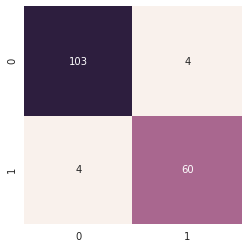

In [25]:
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_fit)
sns.heatmap(data=mat.T, square=True, annot=True, fmt='d', cbar=False)

KNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier

scores = []

for i in range(1,20,1):
    model = KNeighborsClassifier(n_neighbors=i) 
    cv_scores = cross_val_score(model, X, y, cv=5)

    scores.append({
        'score_mean': np.mean(cv_scores),
        'score_std': np.std(cv_scores),
        'n': i
    })

scores_knn = pd.DataFrame(scores)
scores_knn['low'] = scores_knn['score_mean'] - scores_knn['score_std']
scores_knn['high'] = scores_knn['score_mean'] + scores_knn['score_std']

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


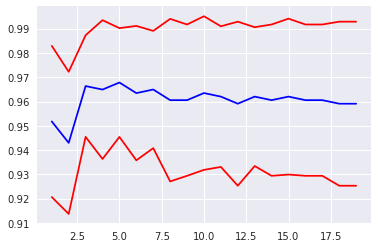

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(scores_knn['n'], scores_knn['low'], color='r')
plt.plot(scores_knn['n'], scores_knn['score_mean'], color='b')
plt.plot(scores_knn['n'], scores_knn['high'], color='r');

a ojo elijo 5

In [35]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [39]:
y_fit_knn = knn_model.predict(X_test)

In [40]:
knn_score = accuracy_score(y_test, y_fit_knn)
knn_score

0.96491228070175439

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


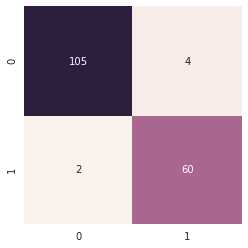

In [42]:
mat = confusion_matrix(y_test, y_fit_knn)
sns.heatmap(data=mat.T, square=True, annot=True, fmt='d', cbar=False)

Naive Bayes

In [43]:
from sklearn.naive_bayes import GaussianNB

model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

GaussianNB(priors=None)

In [45]:
y_fit_nb = model_nb.predict(X_test)

In [46]:
nb_score = accuracy_score(y_test, y_fit_nb)
nb_score

0.95321637426900585

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


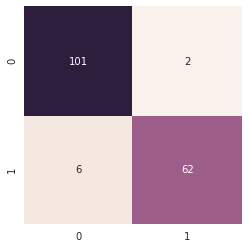

In [47]:
mat_nb = confusion_matrix(y_test, y_fit_nb)
sns.heatmap(data=mat_nb.T, square=True, annot=True, fmt='d', cbar=False)

In [49]:
print('svm', svm_score)
print('knn', knn_score)
print('naive bayes', nb_score)

svm 0.953216374269
knn 0.964912280702
naive bayes 0.953216374269
